In [ ]:
from google.colab import files

uploaded = files.upload()


Saving student-mat.csv to student-mat.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score


In [ ]:
# CELL 2
# Amaç: Veri setini okumak ve ilk bakışı yapmak

df = pd.read_csv("student-mat.csv", sep=";")

print("Veri boyutu:", df.shape)
df.head()


Veri boyutu: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#  3
# Amaç: Veri tiplerini ve genel yapıyı görmek

df.dtypes
# Sayısal kolonların temel istatistikleri
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
#  4
# Amaç: Clustering'de hedef değişken olmaz
# Bu yüzden sadece feature'ları kullanıyoruz

X = df.drop(columns=["G3"])  # G3 çıkarıldı (notu doğrudan kümeye sokmamak için)


In [ ]:
#  5
# Amaç: Her veri tipine uygun preprocessing uygulamak

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [ ]:
#  6
# Amaç:
# - Eksik verileri doldurmak
# - Encoding yapmak
# - Scaling uygulamak
# Clustering algoritmaları mesafeye duyarlıdır

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

X_processed = preprocess.fit_transform(X)


In [ ]:
# 7
# Amaç:
# Yüksek boyutlu veriyi 2 boyuta indirgemek

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Toplam açıklanan varyans:", pca.explained_variance_ratio_.sum())
#PCA’nın ne kadar bilgi koruduğunu ölçüyoruz

Explained variance ratio: [0.13423216 0.09660874]
Toplam açıklanan varyans: 0.23084089779128442


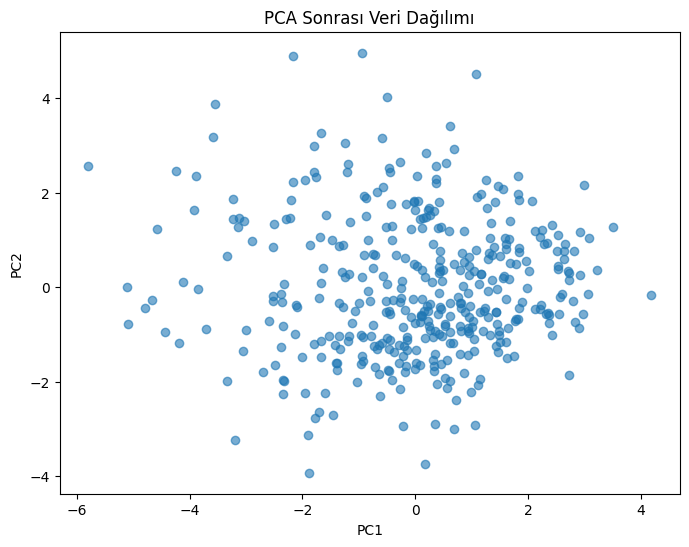

In [ ]:
# 8
# Amaç: PCA sonrası veri dağılımını gözlemlemek

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Sonrası Veri Dağılımı")
plt.show()


In [ ]:
#  9
# Amaç: En uygun küme sayısını silhouette score ile belirlemek

sil_scores = []

K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    sil_scores.append(score)
    print(f"K={k} -> Silhouette Score={score:.4f}")


K=2 -> Silhouette Score=0.0894
K=3 -> Silhouette Score=0.0751
K=4 -> Silhouette Score=0.0490
K=5 -> Silhouette Score=0.0443
K=6 -> Silhouette Score=0.0457
K=7 -> Silhouette Score=0.0429


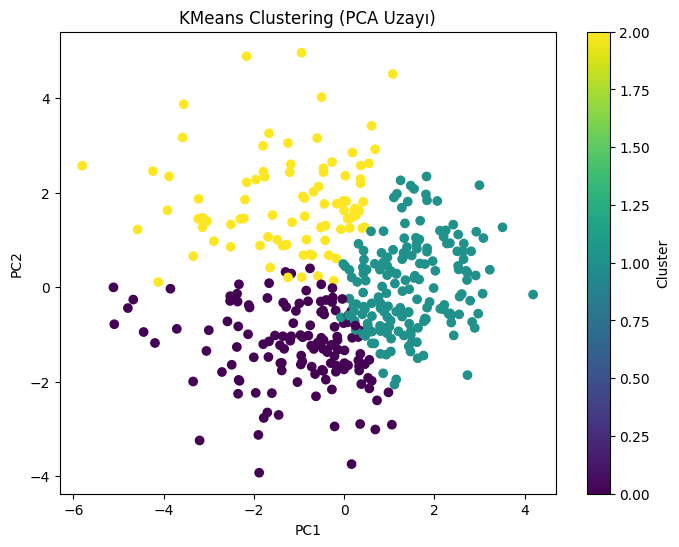

In [ ]:
# CELL 10
# Amaç: Seçilen k değeri ile kümeleri PCA uzayında göstermek

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_processed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering (PCA Uzayı)")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
#  11
# Amaç: KMeans küme kalitesini ölçmek

sil_kmeans = silhouette_score(X_processed, kmeans_labels)
db_kmeans = davies_bouldin_score(X_processed, kmeans_labels)

print("KMeans Silhouette Score:", sil_kmeans)
print("KMeans Davies-Bouldin Index:", db_kmeans)


KMeans Silhouette Score: 0.07507095706247632
KMeans Davies-Bouldin Index: 2.9238972440779487


In [ ]:
#  12
# Amaç:
# - Küme sayısını önceden vermeden clustering yapmak
# - Gürültü (outlier) noktalarını tespit etmek

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_processed)

np.unique(dbscan_labels)


array([-1])

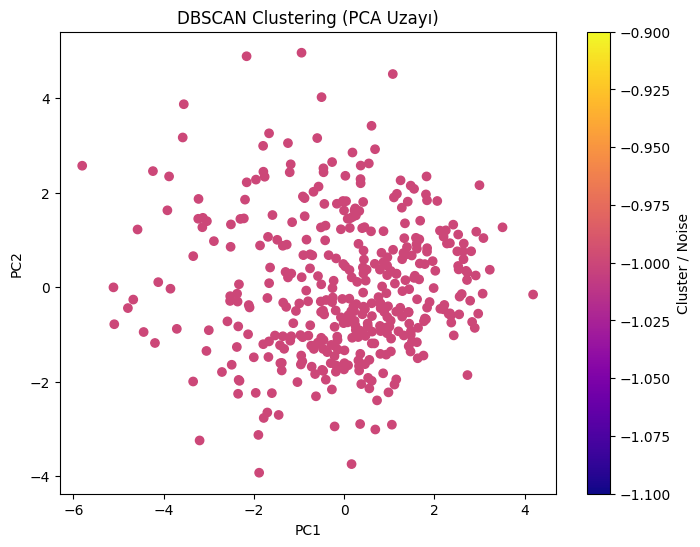

In [ ]:
#  13
# Amaç: DBSCAN sonuçlarını PCA uzayında göstermek

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap="plasma")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clustering (PCA Uzayı)")
plt.colorbar(label="Cluster / Noise")
plt.show()


In [ ]:
#  14
# Amaç: DBSCAN performansını ölçmek
# (Silhouette yalnızca 1'den fazla küme varsa hesaplanabilir)

if len(set(dbscan_labels)) > 1:
    sil_db = silhouette_score(X_processed, dbscan_labels)
    db_db = davies_bouldin_score(X_processed, dbscan_labels)
    print("DBSCAN Silhouette Score:", sil_db)
    print("DBSCAN Davies-Bouldin Index:", db_db)
else:
    print("DBSCAN tek küme veya sadece noise üretti.")


DBSCAN tek küme veya sadece noise üretti.
